 <img src='logo_small.png' align='left' width='70'>
<h1> The Sparks Foundation: Data Science And Business Analytics Tasks </h1>

<h2>Task 1: Prediction Using supervised ML</h2>

<h4>Target : Predict the percentage of an student based on the no. of Study Hours</h4>

<h3>Author : Abdelrahman Ahmed El_Ashaal </h3>

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Dataset
datalink='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(datalink)

In [3]:
# Read the first 5 rows from data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


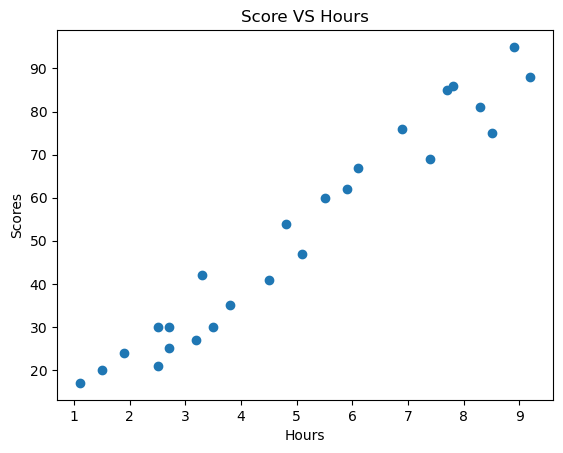

In [6]:
# Visualizing of data
plt.scatter(data.Hours,data.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score VS Hours')
plt.show()

In [7]:
# Feature Columns
x=data.drop('Scores',axis='columns').values

# Label Columns
y=data['Scores'].values

In [8]:
# Divide data to train and test data with size of 80% for train and 20% for Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [9]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [10]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [11]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [12]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [13]:
# Modeling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# Accuracy of training

model.score(x_train,y_train)

0.9515510725211552

In [15]:
# Accuracy of test
model.score(x_test,y_test)

0.9454906892105356

In [16]:
y_pred=model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
pred_vs_actual=pd.DataFrame({'Actual values':y_test,'Predicted Values':y_pred})
pred_vs_actual

,Actual values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


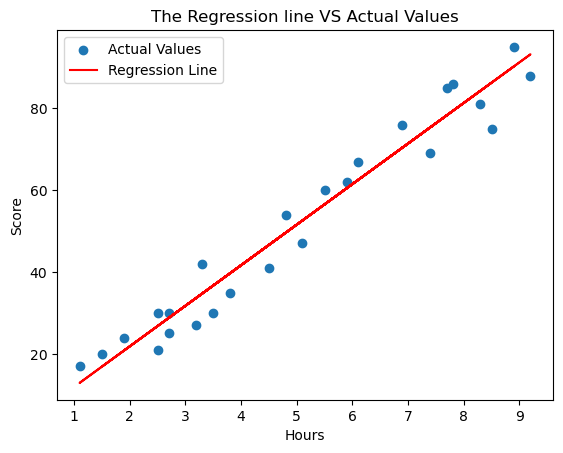

In [18]:
# Visualizing the data and regression line created by model

plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red')
plt.legend(("Actual Values","Regression Line"))
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("The Regression line VS Actual Values")
plt.show()

In [19]:
# Predicting for studing for 9.25 Hours
model.predict([[9.25]])[0]

93.69173248737538

In [20]:
# IF the user want to predict any another value for studing hours
no_ofhours=float(input("Please enter the value of studying hours: "))
print (f'While Studying hours is {no_ofhours} hour the score will be {model.predict([[no_ofhours]])[0]}')

Please enter the value of studying hours: 8.5
While Studying hours is 8.5 hour the score will be 86.2587401268937


In [21]:
# Evaluating The Model
from sklearn.metrics import mean_absolute_error

In [22]:
print(f'The mean absolute Error is: {mean_absolute_error(y_test, y_pred)}')

The mean absolute Error is: 4.183859899002975
